# Train model

In [1]:
batch_size = 1
pickle_file = 'test_dataset_groups.pickle'
limit_seq_len = 500

In [2]:
from dataset import DwgDataset
dwg_dataset = DwgDataset(pickle_file=pickle_file, batch_size=batch_size, limit_seq_len=limit_seq_len)
print (len(dwg_dataset.test_loader))
print (len(dwg_dataset.train_loader))
print (len(dwg_dataset.val_loader))

1
6
1


In [3]:
lr = 2e-4 # best 0.0006
epochs = 142
train_verbose = True

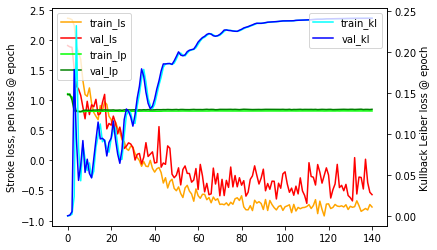

Epoch [141 @ 62.1sec] train losses: ls:-0.8383 lp:0.8236 kl:0.2418 validation losses ls:-0.3898 lp:0.8490 kl:0.2418
Test losses ls:-0.3517 lp:0.8491 kl:0.2418


In [4]:
from sketch_rnn import Trainer
from IPython.display import clear_output
from plot_graphics import plot_history
import time

trainer = Trainer(
    dwg_dataset, 
    lr=lr, 
    train_verbose=train_verbose,
    preload_model=False)

train_s_losses = []
train_p_losses = []
train_kl_losses = []
val_s_losses  = []
val_p_losses  = []
val_kl_losses  = []
start = time.time()

for epoch_no in range(epochs):
    train_ls, train_lp, train_kl, val_ls, val_lp, val_kl = trainer.train_epoch(epoch_no)
    clear_output(wait=True)
    
    plot_history(train_s_losses, train_p_losses, train_kl_losses, val_s_losses, val_p_losses, val_kl_losses)
    print('Epoch [{} @ {:4.1f}sec] train losses: ls:{:1.4f} lp:{:1.4f} kl:{:1.4f} validation losses ls:{:1.4f} lp:{:1.4f} kl:{:1.4f}'.format(
        epoch_no,
        time.time() - start,
        train_ls,
        train_lp,
        train_kl,
        val_ls,
        val_lp,
        val_kl))

    train_s_losses.append(train_ls)
    train_p_losses.append(train_lp)
    train_kl_losses.append(train_kl)
    val_s_losses.append(val_ls)
    val_p_losses.append(val_lp)
    val_kl_losses.append(val_kl)


# Calculate test accuracy
test_ls, test_lp, test_lkl = trainer.CalculateLoaderAccuracy(trainer.test_loader)
print('Test losses ls:{:1.4f} lp:{:1.4f} kl:{:1.4f}'.format(test_ls, test_lp, test_lkl))    